# **Taller semana 7:** Problemas desbalanceados

**Semana 7 - Taller sumativo -** Clasificación de accidentes en maquinaría industrial

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Daniel López*

# Introducción

En este taller trataremos un problema de clasificación desbalanceado. Se trata de un sistema de detección de fallas mecánicas en maquinaría industrial. 

## Descripcción

Este *jupyter notebook* contiene el material necesario para el desarrollo del Taller de la Semana 
7 del curso *MLS: Machine learning supervisado*. 

### Objetivos de aprendizaje

1. identificar un problema de clasificación en el que es necesario incluir costos. 
2. Aplicar métodos de muestreo para resolver problemas de clasificación no balanceados y/o con costos.
3. Aplicar métodos de clasificación que incorporan costos en la fase de entrenamiento.


### Teoría

Para abordar un problema de clasificación con clases desbalanceadas se aplican métodos de balanceo para garantizar la correcta generalización del modelo. Estos métodos buscan aproximar la cantidad de datos que se tiene para cada una de las clases del problema. Algunos de estos métodos son:

<br> **Oversampling (Sobremuestreo):** Consiste en duplicar muestras existentes de la clase minoritaria o generar muestras a partir de combinaciones lineales de muestras cercanas.Esto aumenta la cantidad de muestras de la clase minoritaria hasta generar el balance.

<br> **Undersampling (Submuestreo):** En este caso, se eliminan muestras de la clase mayoritaria para igual la cantidad de muestras de la clase minoritaria. De esta manere se genera el balance de las clases.

Adicionalmente, es posible entrenar modelos con pesos para clases. Es decir, que se le puede asignar una importancia mayor a la clase minoritaria para que los modelos la clasifiquen correctamente. Esto aplica por lo general en algoritmos que tienen arboles involucrados, como Random Forest, y XGBoost 

## Problema y conjunto de datos


El conjunto de datos son variables características de máquinas industriales, sin embargo, no tienen descripcción por motivos de privacidad corporativa. El conjunto de datos fué obtenido de:
https://www.kaggle.com/competitions/playground-series-s3e17

*Referencias:* Walter Reade, Ashley Chow. (2023). Binary Classification of Machine Failures. Kaggle. https://kaggle.com/competitions/playground-series-s3e17


## Metodología

En este cuaderno se realizará una pequeña exploración de datos y se procederá a un ejercicio práctico, donde se realizarán varios modelos basados en árboles en diferentes bases de datos generadas con estrategias de muestreo y submuestreo. Para esto, complete las céldas de código marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

In [146]:
#Importar librerias necesarias

import pandas as pd

%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

In [139]:
df = pd.read_csv('train.csv').drop(['id','Product ID'], axis=1)
df.columns = ['Type', 'Air temperature', 'Process temperature',
       'Rotational speed ', 'Torque ', 'Tool wear ',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [140]:
X = df.drop('Machine failure',axis=1)
X = pd.get_dummies(X)
y = df['Machine failure']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=145)

Machine failure
0    0.984256
1    0.015744
Name: count, dtype: float64


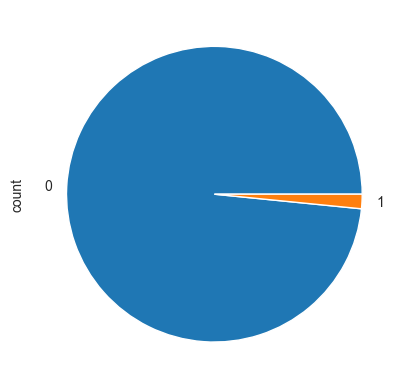

In [142]:
y.value_counts().plot(kind='pie')
print(y.value_counts()/y.shape )

# Ejercicio:

El objetivo de este ejercicio es realizar técnicas de submuestreo y compararlos con modelos que incorporan pesos, así como con modelos sin balancear. Para esto, realizaremos los siguientes pasos:

* Sintonice el algoritmo de XGBoost usando la técnica de RandomizedSearch, optimizando los parámetros Learning Rate, Max depth, n_estimators y reg_lambda. Evalue con datos de prueba, utilice métricas que midan la clasificación de la clase minoritaria.

* Realice la implementación de los algoritmos de submuestreo para los datos correspondientes, posteriormente entrene de nuevo los algoritmos con los datos submuestreados con la mísma técninca de RandomizedSearch. Evalúe en datos de prueba y compare entre los modelos obtenidos hasta el momento.

* Realice la implementacion de los pesos con los métodos vistos anteriormente para los mísmos modelos. Evalúe y compare los resultados de todos los modelos, concluya sobre el mejor modelo para estos datos.

## Entrenamiento base

### XGBoost: Búsqueda aleatoria 

In [143]:
# =====================================================
# COMPLETAR ===========================================
# 
# Realize la búsqueda aleatoria. Ayuda: Guiese por la búsqueda realizada en anteriores lecciones
# your code here
xgb = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
param_list = {
    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10],
    'n_estimators':[100, 300],
    'reg_lambda':[0, 0.1, 0.5, 2]
}

search = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_list,
    n_iter = 20,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)
search.fit(X_train, y_train)
# =====================================================

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 300],
                                        'reg_lambda': [0, 0.1, 0.5, 2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [144]:
def see_results(resultados):
    print(resultados[['param_learning_rate', 'param_max_depth', 'param_n_estimators',
                      'param_reg_lambda', 'mean_test_score']].head())

def report_best_scores(resultados):
    best_row = resultados.sort_values(by="mean_test_score", ascending=False).iloc[0]
    
    best_params = {
        'learning_rate': best_row['param_learning_rate'],
        'max_depth': best_row['param_max_depth'],
        'n_estimators': best_row['param_n_estimators'],
        'reg_lambda': best_row['param_reg_lambda'],
        'mean_test_score': best_row['mean_test_score']
    }
    
    return best_params
    
resultados = pd.DataFrame(search.cv_results_)
see_results(resultados)
best_model_params = report_best_scores(resultados)
best_model_params

   param_learning_rate  param_max_depth  param_n_estimators  param_reg_lambda  \
0                 0.05               10                 300               0.0   
1                 0.05               10                 300               2.0   
2                 0.01                3                 300               0.0   
3                 0.10                3                 300               2.0   
4                 0.05                3                 100               0.5   

   mean_test_score  
0         0.996097  
1         0.996134  
2         0.996097  
3         0.996188  
4         0.996161  


{'learning_rate': np.float64(0.1),
 'max_depth': np.int64(3),
 'n_estimators': np.int64(300),
 'reg_lambda': np.float64(2.0),
 'mean_test_score': np.float64(0.9961884851512943)}

#### XGBoost: Entrenamiento y evaluación con mejores parámetros

In [147]:
# =====================================================
# COMPLETAR ===========================================
# 
# Entrenamiento
# your code here
best_params = search.best_params_
final_xgb = xgb.XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    **best_params
)
final_xgb.fit(X_train, y_train)
# =====================================================

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [148]:
# =====================================================
# COMPLETAR ===========================================
# 
#Evaluación

# your code here
y_pred = final_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud en el conjunto de prueba sin sampler:", accuracy)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación sin sampler:")
print(classification_report(y_test, y_pred))
# =====================================================

Exactitud en el conjunto de prueba sin sampler: 0.9960052774316499
Matriz de confusión:
[[26869     4]
 [  105   308]]
Reporte de clasificación sin sampler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26873
           1       0.99      0.75      0.85       413

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.92     27286
weighted avg       1.00      1.00      1.00     27286



### Submuestreo

In [149]:
# =====================================================
# COMPLETAR ===========================================
# 

# your code here
undersampler = RandomUnderSampler(random_state = 42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
print("distribución nueva: ")
print(y_train_resampled.value_counts())
# =====================================================

distribución nueva: 
Machine failure
0    1735
1    1735
Name: count, dtype: int64


### Selección de modelo

#### XGBoost con datos submuestreados

In [150]:
# =====================================================
# COMPLETAR ===========================================
# 
# Realize la búsqueda aleatoria. Ayuda: Guiese por la búsqueda realizada en anteriores lecciones
# your code here
search.fit(X_train_resampled, y_train_resampled)
# =====================================================


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 300],
                                        'reg_lambda': [0, 0.1, 0.5, 2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [151]:
resultados_sampler = pd.DataFrame(search.cv_results_)
see_results(resultados_sampler)
best_model_under = report_best_scores(resultados_sampler)
best_model_under

   param_learning_rate  param_max_depth  param_n_estimators  param_reg_lambda  \
0                 0.05               10                 300               0.0   
1                 0.05               10                 300               2.0   
2                 0.01                3                 300               0.0   
3                 0.10                3                 300               2.0   
4                 0.05                3                 100               0.5   

   mean_test_score  
0         0.906340  
1         0.911527  
2         0.902594  
3         0.914121  
4         0.906340  


{'learning_rate': np.float64(0.1),
 'max_depth': np.int64(3),
 'n_estimators': np.int64(300),
 'reg_lambda': np.float64(2.0),
 'mean_test_score': np.float64(0.9141210374639769)}

#### XGBoost con submuestreo: Entrenamiento y evaluación con mejores parámetros

In [152]:
# =====================================================
# COMPLETAR ===========================================
# 
# Entrenamiento
# your code here
final_xgb.fit(X_train_resampled, y_train_resampled)
# =====================================================

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [153]:
# =====================================================
# COMPLETAR ===========================================
# 
# Evaluación
# your code here
y_pred_sampler = final_xgb.predict(X_test)
accuracy_sampler = accuracy_score(y_test, y_pred_sampler)
print("Exactitud en el conjunto de prueba sampler:", accuracy_sampler)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_sampler))
print("Reporte de clasificación sampler:")
print(classification_report(y_test, y_pred_sampler))
# =====================================================

Exactitud en el conjunto de prueba sampler: 0.9533826870922818
Matriz de confusión:
[[25654  1219]
 [   53   360]]
Reporte de clasificación sampler:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     26873
           1       0.23      0.87      0.36       413

    accuracy                           0.95     27286
   macro avg       0.61      0.91      0.67     27286
weighted avg       0.99      0.95      0.97     27286



### Conclusiones

## Implementación de pesos


### XGBoost

In [154]:
# =====================================================
# COMPLETAR ===========================================
# 
# Entrenamiento con pesos
# your code here
c1 = df['Machine failure'].value_counts()[0]
c2 = df['Machine failure'].value_counts()[1]

model_weight = XGBClassifier(n_jobs = -1,scale_pos_weight = c1/c2)
model_weight.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
# =====================================================
# COMPLETAR ===========================================

# Evaluación con pesos
# your code here
y_pred_weight = model_weight.predict(X_test)
print(classification_report(y_test,y_pred_weight))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     26873
           1       0.61      0.79      0.69       413

    accuracy                           0.99     27286
   macro avg       0.80      0.89      0.84     27286
weighted avg       0.99      0.99      0.99     27286



YOUR ANSWER HERE